In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

In [3]:
df = df.rename(columns={'데이터':'백만'})
df['시점'].map(lambda x : x.split()[0])

0       2017.1/4
1       2017.2/4
2       2017.3/4
3       2017.4/4
4       2018.1/4
          ...   
2767    2021.2/4
2768    2021.3/4
2769    2021.4/4
2770    2022.1/4
2771    2022.2/4
Name: 시점, Length: 2772, dtype: object

In [4]:
df['연도'] = df['시점'].map(lambda x : int(x.split('.')[0]))
df['연도'].head()

0    2017
1    2017
2    2017
3    2017
4    2018
Name: 연도, dtype: int64

In [5]:
df['분기'] = df['시점'].map(lambda x : int(x.split('.')[1].split('/')[0]))
df['분기']

0       1
1       2
2       3
3       4
4       1
       ..
2767    2
2768    3
2769    4
2770    1
2771    2
Name: 분기, Length: 2772, dtype: int64

In [6]:
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [7]:
df1 = df.drop(df[['국가(대륙)별','상품군별','판매유형별','시점']], axis =1)

In [8]:
df1.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


In [9]:
# Q2 pivot_table
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [10]:
df2 = pd.pivot_table(df, index='국가(대륙)별', columns = '연도', values = '백만', aggfunc = sum)
df2.head()

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019


<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

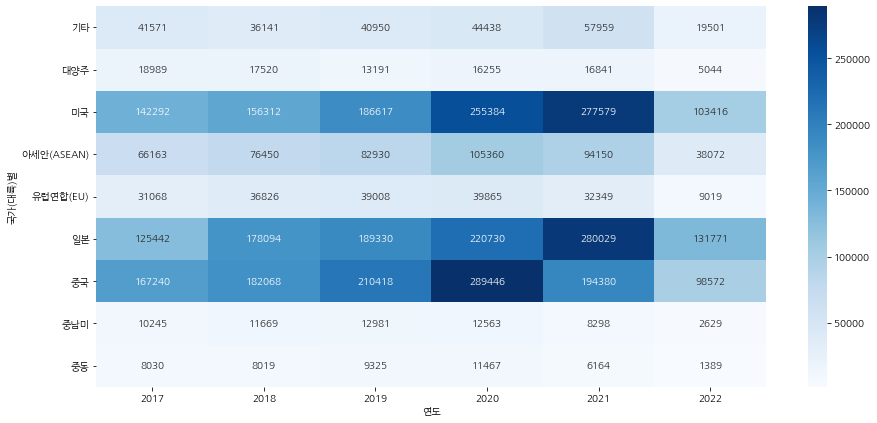

In [11]:
# heatmap을 통한 간단한 시각화
plt.figure(figsize=(15, 7))
sns.heatmap(df2, cmap="Blues", annot=True, fmt=".0f")

In [12]:
# Q3
df3 = df[df['연도'] == 2020]
df3

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1
...,...,...,...,...,...,...,...
2743,기타,생활용품 및 자동차용품,면세점 이외,2020.4/4,392,2020,4
2762,기타,기 타,면세점 이외,2020.1/4,939,2020,1
2763,기타,기 타,면세점 이외,2020.2/4,710,2020,2
2764,기타,기 타,면세점 이외,2020.3/4,826,2020,3


In [13]:
df4 = df3.groupby(['상품군별','국가(대륙)별']).백만.sum()
df4.unstack()

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
상품군별,,,,,,,,,
가전·전자·통신기기,1716,3825,10103,12405,3040,404,1353,912,839
기 타,3345,923,38731,2620,3907,30509,22736,625,533
농축수산물,9,1,33,17,0,2,88,0,0
사무·문구,187,21,398,3279,25,1526,403,3,4
생활용품 및 자동차용품,1464,1198,11467,6432,2560,3911,7142,1361,1060
서 적,4563,367,9709,4192,514,1055,6659,188,139
소프트웨어,21,20,865,3,99,27,4,15,17
스포츠·레저용품,755,690,5862,7423,1297,646,3999,183,196
아동·유아용품,1646,484,4934,2698,1354,1353,5606,151,121


/var/folders/qr/6jsz3w4516vdwmpnz67ktft00000gn/T/ipykernel_59604/1803268793.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df4[df["상품군별"].isin(["의류 및 패션 관련상품","화장품","음반·비디오·악기"])]


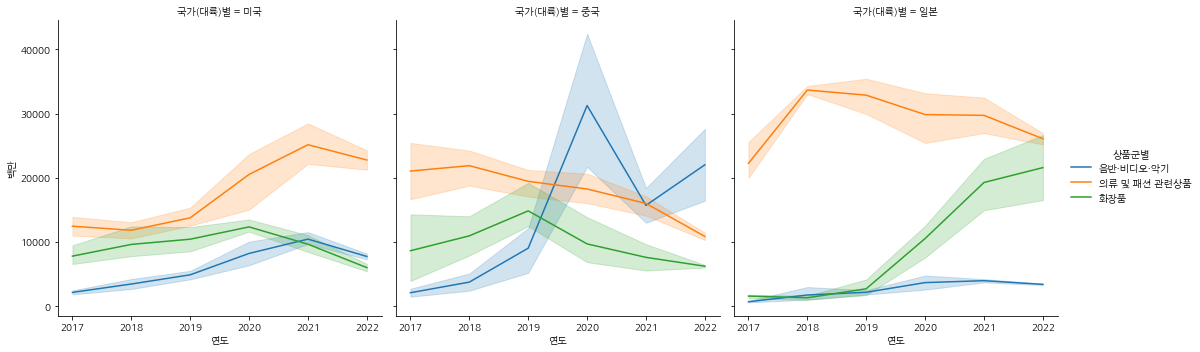

In [14]:
# Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.
df3 = df[~df["연도"].isin(["2022"])]
df4 = df3[df["국가(대륙)별"].isin(["미국","중국","일본"])]
df5 = df4[df["상품군별"].isin(["의류 및 패션 관련상품","화장품","음반·비디오·악기"])]
sns.relplot(data=df5, x="연도", y="백만", hue="상품군별", kind="line", col="국가(대륙)별")

In [15]:
# df_Q3 = df[(df["국가(대륙)별"].str.endswith('국')) & (df[df["국가(대륙)별"].str.endswith('본')])]
df7 = df[(df["국가(대륙)별"] == '중국') & (df["국가(대륙)별"] == '미국') & (df["국가(대륙)별"] == '일본')]
# df_Q3 = df.loc[df.index.str.contains("미국","중국",'일본')]
# df.loc[df.index.str.contains("미국","중국",'일본')]
df7

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기


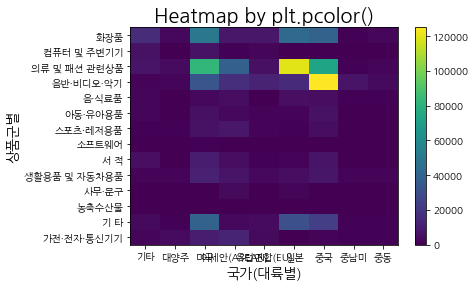

In [16]:
df2=df[(df["연도"]==2020)]
df2=df2.groupby(["상품군별", "국가(대륙)별"]).백만.sum()
df6=df2.unstack()
plt.pcolor(df6)
plt.xticks(np.arange(0.5, len(df6.columns), 1), df6.columns)
plt.yticks(np.arange(0.5, len(df6.index), 1), df6.index)
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel("국가(대륙별)", fontsize=14)
plt.ylabel("상품군별", fontsize=14)
plt.colorbar()
plt.show()

In [22]:
#데이터를 다운받아 raw 데이터를 github에 public하게 올렸습니다.
data = pd.read_csv("https://raw.githubusercontent.com/aijelly/data/main/%ED%95%AD%EA%B3%B5%EC%82%AC%EB%B3%84%ED%86%B5%EA%B3%84_2.csv", encoding="cp949")
df7 = data.copy()

In [23]:
df7

,시점,항공사별,여객 (명)
0,시점,항공사별,계
1,2013.01,아시아나항공,1686193
2,2013.01,제주항공,568439
3,2013.01,진에어,281051
4,2013.01,대한항공,2392761
...,...,...,...
698,2022.09,제주항공,1092298
699,2022.09,진에어,1072312
700,2022.09,대한항공,1540669
701,2022.09,티웨이항공,904677


In [27]:
df7 = df7.drop(index = 0, axis = 1)

In [28]:
df7["항공사별"].unique()

array(['아시아나항공', '제주항공', '진에어', '대한항공', '티웨이항공', '외항사'], dtype=object)

In [29]:
df7["여객 (명)"]  = df7["여객 (명)"].astype(int)/10000
df7["시점"] = pd.to_datetime(df7["시점"])
df7["년도"] = df7["시점"].dt.year
df7["월"] = df7["시점"].dt.month

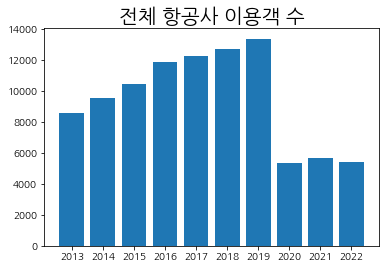

In [30]:
# 연도별 총 비행기 탑승객 수 (동향파악)
df_sum = df7.groupby(["년도"])["여객 (명)"].sum()
plt.bar(df_sum.index , df_sum.values)
plt.xticks(range(2013, 2023))
plt.title("전체 항공사 이용객 수", fontsize=20, y=1)
plt.show()

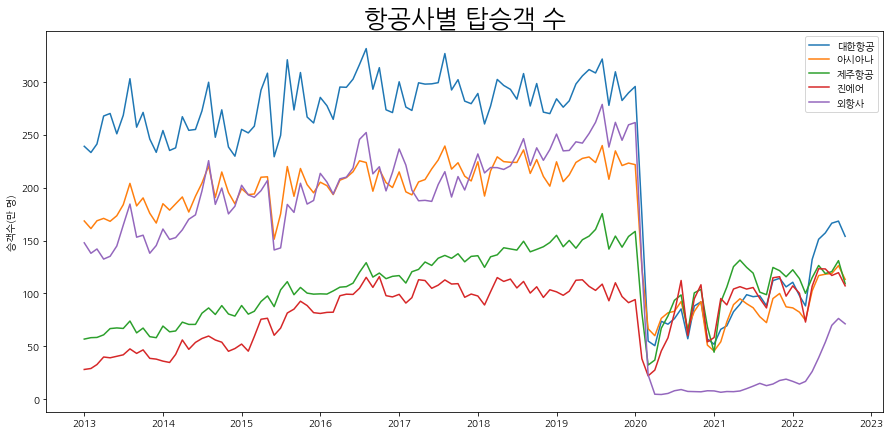

In [32]:
# 시각화 2 : 항공사별로 세분화해서 확인
airlines = ['대한항공','아시아나항공','제주항공','진에어','외항사']

fig, ax = plt.subplots()
for airline in airlines:
  ax.plot(df7[df7['항공사별']==airline]['시점'], df7[df7['항공사별']==airline]["여객 (명)"])
  fig.set_size_inches([15, 7])

plt.legend(('대한항공','아시아나','제주항공', '진에어', '외항사'))
plt.style.use('fivethirtyeight')
plt.ylabel("승객수(만 명)")
plt.title("항공사별 탑승객 수", fontsize=25, y=1)
# plt.xticks(rotation=90)
plt.show()

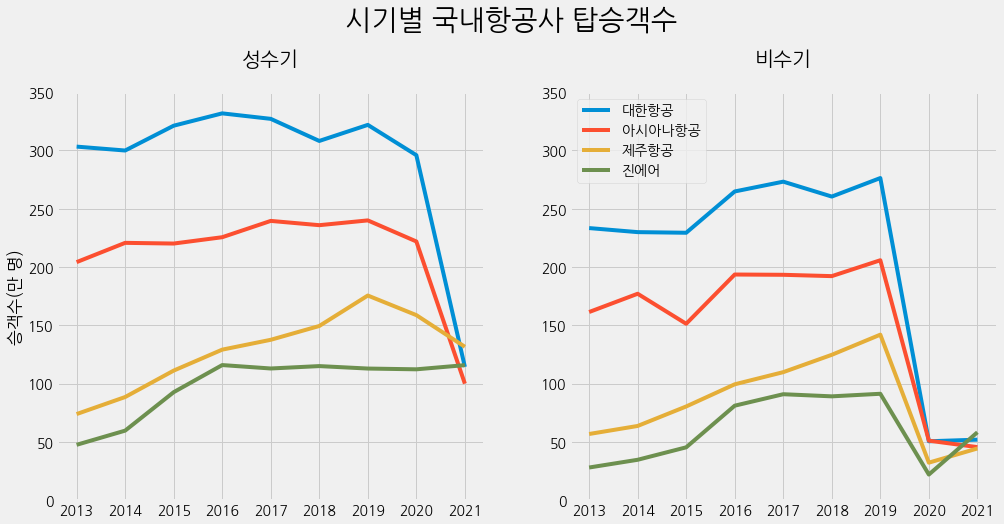

In [33]:
# 시각화3. 비수기(당해 최소탑승객수)/성수기(당해 최대탑승객수) 별 승객수 변화 추이

df0 = df7.query('년도< 2022')
df_max = df0.groupby(["항공사별", "년도"])["여객 (명)"].max()
df_min = df0.groupby(["항공사별", "년도"])["여객 (명)"].min()
airlines = ['대한항공','아시아나항공','제주항공', '진에어']

fig, ax = plt.subplots(1,2, figsize=(15, 7))
for airline in airlines:
  ax[0].plot(df_max[airline].index , df_max[airline])
  ax[1].plot(df_min[airline].index , df_min[airline])

plt.xticks(range(2013, 2022))
ax[0].set_ylim(0, 350)
ax[1].set_ylim(0, 350)
ax[0].set_title("성수기", y=1.05)
ax[1].set_title("비수기", y=1.05)
plt.legend(airlines)

ax[0].set_ylabel("승객수(만 명)")
plt.suptitle("시기별 국내항공사 탑승객수", fontsize=28, y=1.05)

plt.show();